In [7]:
# pip install factor_analyzer


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import FactorAnalysis
# from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo
from sklearn.decomposition import PCA

# **Exploratory Data Analysis Part**

In [9]:
# Load the train Data set
train_data = pd.read_csv('/kaggle/input/widsdatathon2024-challenge2/train.csv')
test_data = pd.read_csv('/kaggle/input/widsdatathon2024-challenge2/test.csv')

In [10]:
train_data.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,...,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,...,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33
2,277055,NaN,COMMERCIAL,CA,925,West,Pacific,59,F,NaN,...,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157
3,320055,Hispanic,MEDICAID,CA,900,West,Pacific,59,F,NaN,...,63.34,63.10,67.45,75.86,75.24,71.10,68.95,65.46,59.46,146
4,190386,NaN,COMMERCIAL,CA,934,West,Pacific,71,F,NaN,...,59.45,60.24,64.77,69.81,70.13,68.10,65.38,60.72,54.08,286


In [11]:
# Find the dimension of the data set
train_data.shape


(13173, 152)

In [12]:
test_data.shape

(5646, 151)

In [13]:
# Information about the data set
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13173 entries, 0 to 13172
Columns: 152 entries, patient_id to metastatic_diagnosis_period
dtypes: float64(137), int64(4), object(11)
memory usage: 15.3+ MB


In [14]:
train_data.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
count,13173.000000,13173.000000,13173.000000,4102.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,...,13173.000000,13173.000000,13164.000000,13127.000000,13157.000000,13166.000000,13166.000000,13161.000000,13140.000000,13173.000000
mean,555441.784939,568.530859,59.271313,29.168808,20651.373928,1776.872376,40.542676,11.104988,12.857587,13.297375,...,52.411982,67.932236,73.074635,77.120929,76.281156,71.417027,59.323286,46.100150,42.096213,96.515221
std,259476.503094,275.758485,13.218883,5.752820,13840.379638,3876.061897,4.031027,1.511534,1.952248,3.390472,...,11.069900,6.301740,6.581630,5.335091,5.282156,6.502875,9.261934,12.245594,11.209011,108.969873
min,100043.000000,100.000000,18.000000,15.000000,635.550000,0.920000,20.600000,0.000000,6.310000,5.930000,...,28.790000,45.880000,53.460000,58.540000,56.200000,51.830000,37.540000,19.150000,15.380000,0.000000
25%,335100.000000,330.000000,50.000000,24.825000,9160.340000,163.150000,37.190000,10.150000,11.650000,11.000000,...,42.900000,63.220000,68.050000,73.170000,72.550000,67.020000,51.970000,35.560000,33.370000,3.000000
50%,555769.000000,557.000000,59.000000,28.580000,18952.780000,700.340000,40.640000,11.000000,12.900000,12.530000,...,50.290000,66.120000,71.640000,76.650000,76.080000,70.880000,57.450000,42.430000,38.500000,44.000000
75%,780967.000000,832.000000,67.000000,33.000000,30021.280000,1666.520000,42.940000,12.140000,13.910000,14.970000,...,62.220000,72.590000,77.660000,80.290000,79.130000,75.640000,67.360000,55.730000,50.500000,181.000000
max,999982.000000,995.000000,91.000000,97.000000,71374.130000,29851.690000,54.570000,17.680000,35.300000,62.100000,...,76.490000,86.570000,90.660000,96.430000,95.770000,89.190000,81.460000,76.300000,73.540000,365.000000


In [15]:
# Find the null value for each column
train_data.isnull().sum()

patient_id                        0
patient_race                   6657
payer_type                     1765
patient_state                     0
patient_zip3                      0
                               ... 
Average of Sep-18                 7
Average of Oct-18                 7
Average of Nov-18                12
Average of Dec-18                33
metastatic_diagnosis_period       0
Length: 152, dtype: int64

In [ ]:
plt.figure(figsize = (16,9))
sns.heatmap(train_data.isnull())

<Axes: >

# Drop the columns


In [17]:
# Find the null percent
null_percent = train_data.isnull().sum()/train_data.shape[0]*100
null_percent

patient_id                      0.000000
patient_race                   50.535186
payer_type                     13.398618
patient_state                   0.000000
patient_zip3                    0.000000
                                 ...    
Average of Sep-18               0.053139
Average of Oct-18               0.053139
Average of Nov-18               0.091095
Average of Dec-18               0.250512
metastatic_diagnosis_period     0.000000
Length: 152, dtype: float64

In [18]:
null_percent[null_percent > 20]

patient_race                             50.535186
bmi                                      68.860548
metastatic_first_novel_treatment         99.916496
metastatic_first_novel_treatment_type    99.916496
dtype: float64

In [19]:
null_percent[(null_percent < 20) & (null_percent > 5)]

payer_type    13.398618
dtype: float64

In [20]:
null_percent[null_percent < 5]

patient_id                     0.000000
patient_state                  0.000000
patient_zip3                   0.000000
Region                         0.000000
Division                       0.000000
                                 ...   
Average of Sep-18              0.053139
Average of Oct-18              0.053139
Average of Nov-18              0.091095
Average of Dec-18              0.250512
metastatic_diagnosis_period    0.000000
Length: 147, dtype: float64

In [21]:
null_percent[(null_percent > 0.1) & (null_percent < 5)]

Average of Jan-13    0.250512
Average of Jun-13    0.151826
Average of Aug-13    0.129052
Average of Sep-13    0.204965
Average of Oct-13    0.447886
Average of Mar-14    0.220147
Average of Apr-14    1.366431
Average of Jun-14    1.153875
Average of Nov-14    0.182191
Average of Apr-15    0.212556
Average of Aug-15    0.167008
Average of Oct-15    0.121461
Average of Nov-15    0.121461
Average of Dec-15    0.136643
Average of Jan-16    0.121461
Average of Feb-16    0.121461
Average of May-16    0.144234
Average of Jul-16    0.121461
Average of Jul-17    0.235330
Average of Oct-17    0.159417
Average of Jul-18    0.349199
Average of Aug-18    0.121461
Average of Dec-18    0.250512
dtype: float64

In [22]:
null_percent[(null_percent < 0.1)]

patient_id                     0.000000
patient_state                  0.000000
patient_zip3                   0.000000
Region                         0.000000
Division                       0.000000
                                 ...   
Average of Jun-18              0.068322
Average of Sep-18              0.053139
Average of Oct-18              0.053139
Average of Nov-18              0.091095
metastatic_diagnosis_period    0.000000
Length: 124, dtype: float64

In [23]:
train = train_data

In [24]:
test = test_data

In [25]:
train.shape

(13173, 152)

In [26]:
test.shape

(5646, 151)

## Drop the null values

##### Here same way apply to data preprocessing part for test data set and train data set because data set treated consistenly

In [27]:
columns = ['patient_race','bmi','metastatic_first_novel_treatment','metastatic_first_novel_treatment_type']
train.drop(columns = columns,inplace = True)
test.drop(columns = columns,inplace = True)

In [28]:
train.shape

(13173, 148)

In [29]:
test.shape

(5646, 147)

In [30]:
train['payer_type'].dtype

dtype('O')

In [31]:
train['payer_type'].unique()

array(['COMMERCIAL', nan, 'MEDICAID', 'MEDICARE ADVANTAGE'], dtype=object)

In [32]:
test['payer_type'].isnull().sum()

785

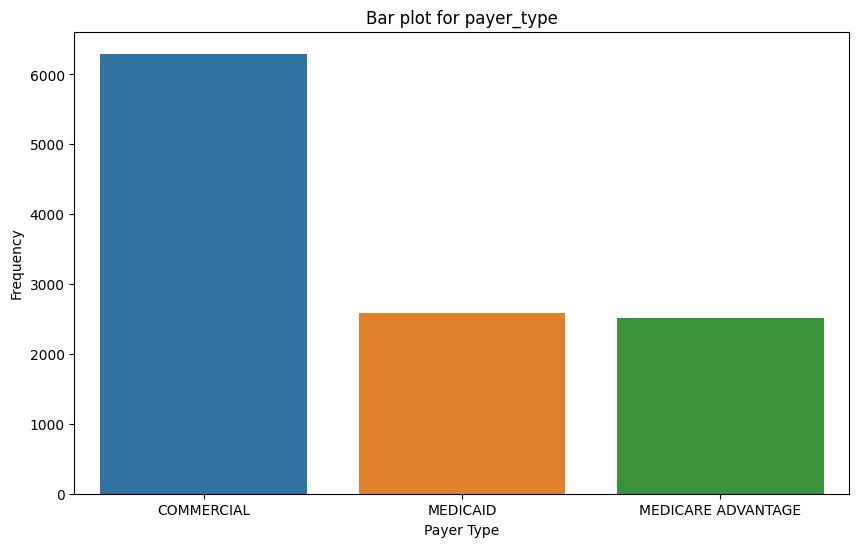

In [33]:
# Draw the counter plot for payer_type
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='payer_type')
plt.title("Bar plot for payer_type")
plt.xlabel('Payer Type')
plt.ylabel('Frequency')
plt.show()

## Imutation

In [34]:
# Replace missing payer_type values with the mode_train
payer_mode = train['payer_type'].mode()[0]
train['payer_type'].fillna(payer_mode, inplace=True)


/tmp/ipykernel_33/2568602795.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['payer_type'].fillna(payer_mode, inplace=True)


In [35]:
test['payer_type'].fillna(payer_mode,inplace = True)

/tmp/ipykernel_33/2519844321.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['payer_type'].fillna(payer_mode,inplace = True)


In [36]:
train['payer_type'].isnull().sum()

0

In [37]:
test['payer_type'].isnull().sum()

0

In [38]:
print(f"shape of train: {train.shape} \n shape of test: {test.shape}")

shape of train: (13173, 148) 
 shape of test: (5646, 147)


In [ ]:
plt.figure(figsize = (16,9))
sns.heatmap(train.isnull())

<Axes: >

In [ ]:
train[['Average of Apr-14', 'Average of Jun-14']].isnull().sum()

In [ ]:
test[['Average of Apr-14','Average of Jun-14' ]].isnull().sum()

# Average_of_Apr_14

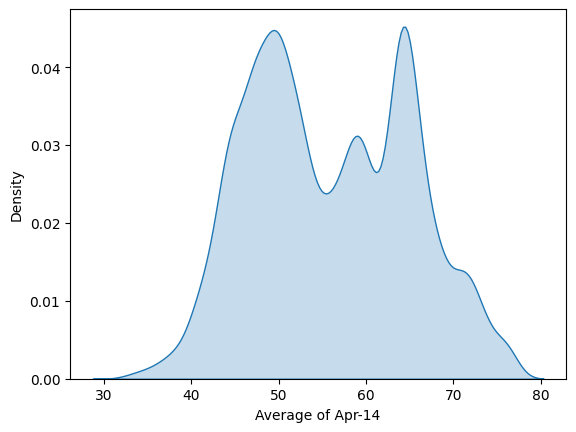

In [42]:
# Draw the density plot for Average of Apr_14
sns.kdeplot(train['Average of Apr-14'], shade=True)

In [43]:
print("Mean value is ",train['Average of Apr-14'].mean())
print("Median value is ",train['Average of Apr-14'].median())
print("Mode Value is ",train['Average of Apr-14'].mode()[0])

Mean value is  55.89005695374433
Median value is  55.35
Mode Value is  49.99


In [44]:
# Replace missing Average of Apr-14 values with the median
median_apr =train['Average of Apr-14'].median()
train['Average of Apr-14'].fillna(median_apr, inplace=True)

/tmp/ipykernel_33/3824929721.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Average of Apr-14'].fillna(median_apr, inplace=True)


In [45]:
train['Average of Apr-14'].isnull().sum()

0

###### test_data


In [46]:
test['Average of Apr-14'].fillna(median_apr, inplace=True)

/tmp/ipykernel_33/2523701501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Average of Apr-14'].fillna(median_apr, inplace=True)


In [47]:
test['Average of Apr-14'].isnull().sum()

0

# Average of Jun-14

In [48]:
print("Mean value is ",train['Average of Jun-14'].mean())
print("Median value is ",train['Average of Jun-14'].median())
print("Mode Value is ",train['Average of Jun-14'].mode()[0])

Mean value is  72.39756316719145
Median value is  71.41
Mode Value is  70.54


In [49]:
# Replace missing Average of Jun-14 values with the median
median_jun =train['Average of Jun-14'].median()
train['Average of Jun-14'].fillna(median_jun, inplace=True)

/tmp/ipykernel_33/56571893.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Average of Jun-14'].fillna(median_jun, inplace=True)


In [50]:
train['Average of Jun-14'].isnull().sum()

0

###### Test_data

In [51]:
test['Average of Jun-14'].fillna(median_jun, inplace=True)
test['Average of Jun-14'].isnull().sum()

/tmp/ipykernel_33/426542378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Average of Jun-14'].fillna(median_jun, inplace=True)


0

In [ ]:
plt.figure(figsize = (16,9))
sns.heatmap(train.isnull())

<Axes: >

In [ ]:
plt.figure(figsize = (16,9))
sns.heatmap(test.isnull())

<Axes: >

In [54]:
train.shape

(13173, 148)

In [55]:
test.shape

(5646, 147)

In [56]:
nan_train = train.isnull().sum()

In [57]:
nan_train[nan_train > 0]

family_size                  5
family_dual_income           5
income_household_median      5
income_household_under_5     5
income_household_5_to_10     5
                            ..
Average of Aug-18           16
Average of Sep-18            7
Average of Oct-18            7
Average of Nov-18           12
Average of Dec-18           33
Length: 65, dtype: int64

In [58]:
# Remove rows with Null values
train.dropna(inplace = True)

In [59]:
test_null = test.isnull().sum()

In [60]:
test_null[test_null > 0]

Average of Jan-13     9
Average of Jun-13     7
Average of Aug-13     5
Average of Sep-13    14
Average of Oct-13    27
Average of Jan-14     3
Average of Feb-14     6
Average of Mar-14    17
Average of Nov-14     9
Average of Jan-15     3
Average of Feb-15     6
Average of Mar-15     6
Average of Apr-15    10
Average of Aug-15    15
Average of Oct-15     4
Average of Nov-15     4
Average of Dec-15     5
Average of Jan-16     4
Average of Feb-16     4
Average of May-16     4
Average of Jul-16     4
Average of Dec-16     2
Average of Jan-17     3
Average of Jun-17     1
Average of Jul-17    13
Average of Sep-17     2
Average of Oct-17    15
Average of Nov-17     6
Average of Feb-18     6
Average of Mar-18     7
Average of Jun-18     5
Average of Jul-18    16
Average of Aug-18     7
Average of Sep-18     2
Average of Oct-18     2
Average of Nov-18     8
Average of Dec-18    23
dtype: int64

In [61]:
# Fill the null values
test = test.fillna(0)

In [62]:
test_null_1 = test.isnull().sum()

In [63]:
test_null_1[test_null_1 > 0]

Series([], dtype: int64)

In [64]:
train.shape

(12914, 148)

In [65]:
test.shape

(5646, 147)

In [66]:
# Find the uniques values for patient_state
train['patient_state'].unique()

array(['AR', 'IL', 'CA', 'IN', 'OH', 'DE', 'LA', 'PA', 'MN', 'MI', 'NY',
       'FL', 'CO', 'KY', 'GA', 'TX', 'VA', 'NC', 'HI', 'NM', 'NV', 'MD',
       'MO', 'SC', 'AZ', 'UT', 'WA', 'NE', 'OR', 'IA', 'ID', 'WI', 'TN',
       'OK', 'AL', 'MT', 'KS', 'AK', 'WY', 'MS', 'SD', 'DC', 'WV', 'ND'],
      dtype=object)

In [67]:
train['patient_gender'].unique()

array(['F'], dtype=object)

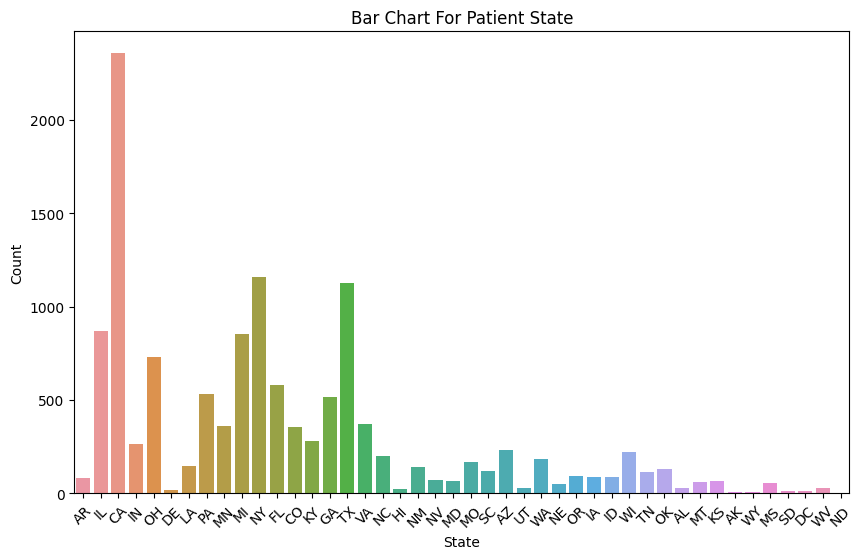

In [68]:
# Draw the Bar chart for patient State
plt.figure(figsize=(10, 6))
plt.title('Bar Chart For Patient State')
sns.countplot(data=train, x='patient_state')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In California, most people are affected by cancer, while in Delaware, Alaska, and Wyoming, fewer people are affected by cancer

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


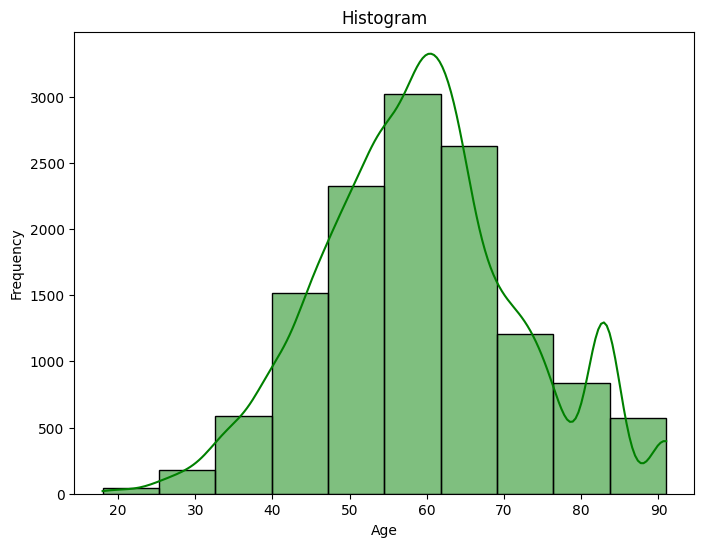

In [69]:
# Draw the Histogram For Patien Age
plt.figure(figsize=(8, 6))
plt.title('Histogram')
sns.histplot(train['patient_age'], bins=10, kde=True, color='green')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Between the ages of 55 and 70, most females are affected by cancer.The primary peak occurs around age 60, indicating a significant concentration of cases within this demographic. Additionally, a secondary peak is observed around age 80, suggesting another notable increase in cancer incidence among individuals in their eighties.

### Dealing with categorical and Numerical values

In [70]:
def colnames(df):
    # Get the Categorical variables
    cat_col = [col for col in df.columns if df[col].dtype not in ["int64", "float64"]]

    # Get the Numeric variables
    num_col = [col for col in df.columns if df[col].dtype in ["int64", "float64"]]

    # Get the Numerical but Categorical
    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtype in ["int64", "float64"]]

    # Adding num_but_cat to cat_cols
    cat_cols = num_but_cat + cat_col

    # num_but_cat remove from num_col
    num_col = [col for col in num_col if col not in num_but_cat]

    # Categorical but Ordinal Variable
    cat_but_ordinal = [col for col in cat_col if df[col].nunique() > 10]

    print(f"Numerical cols: {num_col} \nCategorical cols: {cat_col} \nNumerical but Categorical: {num_but_cat} \nCategorical but Ordinal: {cat_but_ordinal}")

    return num_col, cat_cols,cat_but_ordinal


In [71]:
numerical_cols,categorical_cols,categorical_ordinal = colnames(train)

Numerical cols: ['patient_id', 'patient_zip3', 'patient_age', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'income_individual_median', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above', 'education_stem_degree', 'labor_force_par

In [72]:
print(f"Numerial: {len(numerical_cols)} \n Categorical : {len(categorical_cols)}")

Numerial: 140 
 Categorical : 8


In [73]:
train[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,12914.0,555737.426824,259401.529690,100043.00,335513.00,556682.00,781222.75,999982.00
patient_zip3,12914.0,569.212715,275.913075,100.00,330.00,559.00,826.25,995.00
patient_age,12914.0,59.271024,13.216763,18.00,50.00,59.00,67.00,91.00
population,12914.0,20662.175383,13931.827344,635.55,9079.98,18744.07,30021.28,71374.13
density,12914.0,1793.964704,3911.545576,0.92,161.93,700.34,1666.52,29851.69
...,...,...,...,...,...,...,...,...
Average of Sep-18,12914.0,71.399490,6.480832,51.83,67.02,70.88,75.59,89.19
Average of Oct-18,12914.0,59.315989,9.264887,37.54,51.97,57.61,67.24,81.46
Average of Nov-18,12914.0,46.117112,12.279662,19.15,35.52,42.43,55.80,76.30
Average of Dec-18,12914.0,42.125713,11.227638,15.38,33.37,38.52,50.52,73.54


In [74]:
train.head(2)

,patient_id,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,COMMERCIAL,AR,724,South,West South Central,39,F,C50912,Malignant neoplasm of unspecified site of left...,...,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,COMMERCIAL,IL,629,Midwest,East North Central,55,F,C50412,Malig neoplasm of upper-outer quadrant of left...,...,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33


In [ ]:
# Check the correlation between numerical columns
sns.heatmap(train[numerical_cols].corr(),annot = True, linewidth = 0.5)

<Axes: >

In [ ]:
selected_columns = ['Average of Jan-13', 'Average of Feb-13', 'Average of Mar-13', 'Average of Apr-13', 'Average of May-13', 'Average of Jun-13', 'Average of Jul-13', 'Average of Aug-13', 'Average of Sep-13', 'Average of Oct-13', 'Average of Nov-13', 'Average of Dec-13', 'Average of Jan-14', 'Average of Feb-14', 'Average of Mar-14', 'Average of Apr-14', 'Average of May-14', 'Average of Jul-14', 'Average of Aug-14', 'Average of Sep-14', 'Average of Oct-14', 'Average of Nov-14', 'Average of Dec-14', 'Average of Jan-15', 'Average of Feb-15', 'Average of Mar-15', 'Average of Apr-15', 'Average of May-15', 'Average of Jun-15', 'Average of Jul-15', 'Average of Aug-15', 'Average of Sep-15', 'Average of Oct-15', 'Average of Nov-15', 'Average of Dec-15', 'Average of Jan-16', 'Average of Feb-16', 'Average of Mar-16', 'Average of Apr-16', 'Average of May-16', 'Average of Jun-16', 'Average of Jul-16', 'Average of Aug-16', 'Average of Sep-16', 'Average of Oct-16', 'Average of Nov-16', 'Average of Dec-16', 'Average of Jan-17', 'Average of Feb-17', 'Average of Mar-17', 'Average of Apr-17', 'Average of May-17', 'Average of Jun-17', 'Average of Jul-17', 'Average of Aug-17', 'Average of Sep-17', 'Average of Oct-17', 'Average of Nov-17', 'Average of Dec-17', 'Average of Jan-18', 'Average of Feb-18', 'Average of Mar-18', 'Average of Apr-18', 'Average of May-18', 'Average of Jun-18', 'Average of Jul-18', 'Average of Aug-18', 'Average of Sep-18', 'Average of Oct-18', 'Average of Nov-18', 'Average of Dec-18', 'metastatic_diagnosis_period']

In [ ]:
sns.heatmap(train[selected_columns].corr(),annot = True, linewidth = 0.5)

<Axes: >

In [ ]:
corr_matrix = train[selected_columns].corr()

In [ ]:
corr_matrix

,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
Average of Jan-13,1.000000,0.978516,0.932736,0.948837,0.826647,0.617633,0.474101,0.624946,0.819851,0.947657,...,0.944258,0.523280,0.518465,0.640446,0.652516,0.771047,0.974163,0.976020,0.988915,-0.010277
Average of Feb-13,0.978516,1.000000,0.973929,0.949843,0.828987,0.627959,0.495301,0.663637,0.843623,0.928252,...,0.969119,0.516356,0.525459,0.667789,0.651916,0.739197,0.960608,0.976980,0.979415,-0.010097
Average of Mar-13,0.932736,0.973929,1.000000,0.928471,0.818825,0.637262,0.537821,0.672754,0.829002,0.887092,...,0.969495,0.460224,0.507354,0.706616,0.667352,0.710588,0.920174,0.958905,0.943563,-0.005924
Average of Apr-13,0.948837,0.949843,0.928471,1.000000,0.916769,0.767867,0.653059,0.751261,0.881477,0.960448,...,0.967177,0.664739,0.667858,0.774037,0.782274,0.870273,0.981364,0.928666,0.943248,0.005737
Average of May-13,0.826647,0.828987,0.818825,0.916769,1.000000,0.879506,0.759351,0.877744,0.943053,0.923759,...,0.869318,0.814854,0.823255,0.870890,0.890520,0.919442,0.895034,0.783361,0.824280,0.006814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Average of Sep-18,0.771047,0.739197,0.710588,0.870273,0.919442,0.917541,0.813168,0.865186,0.891537,0.867965,...,0.820523,0.857164,0.883477,0.886944,0.923269,1.000000,0.861122,0.698666,0.742312,0.012183
Average of Oct-18,0.974163,0.960608,0.920174,0.981364,0.895034,0.721124,0.588106,0.710751,0.876699,0.975908,...,0.956272,0.634236,0.632809,0.736019,0.754145,0.861122,1.000000,0.950246,0.970025,0.001375
Average of Nov-18,0.976020,0.976980,0.958905,0.928666,0.783361,0.547647,0.438689,0.569822,0.774669,0.913393,...,0.947261,0.404415,0.422213,0.606482,0.605605,0.698666,0.950246,1.000000,0.989039,-0.008629
Average of Dec-18,0.988915,0.979415,0.943563,0.943248,0.824280,0.583374,0.448242,0.601841,0.810967,0.943768,...,0.942446,0.483057,0.478719,0.624685,0.638539,0.742312,0.970025,0.989039,1.000000,-0.007536


In [ ]:
corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
Average of Jan-13,1.000000,0.978516,0.932736,0.948837,0.826647,0.617633,NaN,0.624946,0.819851,0.947657,...,0.944258,0.523280,0.518465,0.640446,0.652516,0.771047,0.974163,0.976020,0.988915,NaN
Average of Feb-13,0.978516,1.000000,0.973929,0.949843,0.828987,0.627959,NaN,0.663637,0.843623,0.928252,...,0.969119,0.516356,0.525459,0.667789,0.651916,0.739197,0.960608,0.976980,0.979415,NaN
Average of Mar-13,0.932736,0.973929,1.000000,0.928471,0.818825,0.637262,0.537821,0.672754,0.829002,0.887092,...,0.969495,NaN,0.507354,0.706616,0.667352,0.710588,0.920174,0.958905,0.943563,NaN
Average of Apr-13,0.948837,0.949843,0.928471,1.000000,0.916769,0.767867,0.653059,0.751261,0.881477,0.960448,...,0.967177,0.664739,0.667858,0.774037,0.782274,0.870273,0.981364,0.928666,0.943248,NaN
Average of May-13,0.826647,0.828987,0.818825,0.916769,1.000000,0.879506,0.759351,0.877744,0.943053,0.923759,...,0.869318,0.814854,0.823255,0.870890,0.890520,0.919442,0.895034,0.783361,0.824280,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Average of Sep-18,0.771047,0.739197,0.710588,0.870273,0.919442,0.917541,0.813168,0.865186,0.891537,0.867965,...,0.820523,0.857164,0.883477,0.886944,0.923269,1.000000,0.861122,0.698666,0.742312,NaN
Average of Oct-18,0.974163,0.960608,0.920174,0.981364,0.895034,0.721124,0.588106,0.710751,0.876699,0.975908,...,0.956272,0.634236,0.632809,0.736019,0.754145,0.861122,1.000000,0.950246,0.970025,NaN
Average of Nov-18,0.976020,0.976980,0.958905,0.928666,0.783361,0.547647,NaN,0.569822,0.774669,0.913393,...,0.947261,NaN,NaN,0.606482,0.605605,0.698666,0.950246,1.000000,0.989039,NaN
Average of Dec-18,0.988915,0.979415,0.943563,0.943248,0.824280,0.583374,NaN,0.601841,0.810967,0.943768,...,0.942446,NaN,NaN,0.624685,0.638539,0.742312,0.970025,0.989039,1.000000,NaN


In [ ]:
train.shape

(12914, 148)

In [ ]:
train[categorical_ordinal].nunique()

patient_state                       44
breast_cancer_diagnosis_code        47
breast_cancer_diagnosis_desc        47
metastatic_cancer_diagnosis_code    43
dtype: int64

In [ ]:
categorical_cols

['payer_type',
 'patient_state',
 'Region',
 'Division',
 'patient_gender',
 'breast_cancer_diagnosis_code',
 'breast_cancer_diagnosis_desc',
 'metastatic_cancer_diagnosis_code']

In [ ]:
# Find the target mean for each categorical variables
for col in categorical_cols:
   print(pd.DataFrame({"target mean ": train.groupby(col)["metastatic_diagnosis_period"].mean()}),end = "\n\n")

                    target mean 
payer_type                      
COMMERCIAL             96.955858
MEDICAID               93.362846
MEDICARE ADVANTAGE     98.973116

               target mean 
patient_state              
AK                94.142857
AL               106.103448
AR                99.296296
AZ               104.601732
CA                93.507216
CO                60.304225
DC               115.066667
DE                71.842105
FL                89.889655
GA               104.332689
HI               116.333333
IA                94.272727
ID               133.831461
IL               100.509759
IN               101.825095
KS                68.876923
KY               116.882979
LA                78.337838
MD               100.750000
MI                95.518735
MN               104.303030
MO                91.530120
MS                87.660714
MT                74.539683
NC                97.594059
ND                47.250000
NE                65.519231
NM               113.3

## Target Encoding


In [ ]:
for col in categorical_cols:
  target = train.groupby(col)['metastatic_diagnosis_period'].mean()
  train[col + '_encoded'] = train[col].map(target)
  test[col + '_encoded'] = train[col].map(target) # Because keep the consistency

In [ ]:
# Remove the Categprical Variables
train.drop(columns= categorical_cols, inplace=True)


In [ ]:
train.head(10)

,patient_id,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Average of Dec-18,metastatic_diagnosis_period,payer_type_encoded,patient_state_encoded,Region_encoded,Division_encoded,patient_gender_encoded,breast_cancer_diagnosis_code_encoded,breast_cancer_diagnosis_desc_encoded,metastatic_cancer_diagnosis_code_encoded
0,268700,724,39,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,...,41.18,191,96.955858,99.296296,97.336937,95.130464,96.635434,57.388827,57.388827,88.929481
1,484983,629,55,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,...,39.71,33,96.955858,100.509759,96.284707,96.955767,96.635434,61.021445,61.021445,88.929481
2,277055,925,59,38343.18,700.34,36.28,13.27,15.66,13.49,13.45,...,55.58,157,96.955858,93.507216,92.487805,93.240525,96.635434,227.288411,227.288411,88.929481
3,320055,900,59,36054.12,5294.33,36.65,9.76,11.27,17.23,17.44,...,59.46,146,93.362846,93.507216,92.487805,93.240525,96.635434,59.180947,59.180947,88.929481
4,190386,934,71,13700.37,400.48,41.78,10.03,16.43,12.97,11.29,...,54.08,286,96.955858,93.507216,92.487805,93.240525,96.635434,225.081081,225.081081,108.262487
5,559027,461,63,9322.89,274.74,40.12,12.23,13.88,11.53,11.94,...,35.43,73,96.955858,101.825095,96.284707,96.955767,96.635434,227.288411,227.288411,62.142857
6,293747,448,57,5890.57,122.39,42.45,12.43,13.19,10.81,10.73,...,34.10,59,98.973116,95.180575,96.284707,96.955767,96.635434,61.021445,61.021445,104.580392
7,517596,198,56,22036.40,1450.51,41.63,11.03,11.98,12.11,13.69,...,37.68,316,96.955858,71.842105,97.336937,96.740084,96.635434,54.885965,54.885965,110.408840
8,533188,706,65,7219.77,531.06,39.54,12.45,14.79,11.00,12.54,...,53.39,86,96.955858,78.337838,97.336937,95.130464,96.635434,62.052632,62.052632,88.929481
9,639484,922,60,16549.83,245.10,44.23,9.89,10.41,13.67,11.39,...,53.04,184,96.955858,93.507216,92.487805,93.240525,96.635434,57.388827,57.388827,88.929481


In [ ]:
# Remove breast_cancer_diagnosis_desc_encode code
train.drop(columns= 'breast_cancer_diagnosis_desc_encoded', inplace=True)


In [ ]:
train.head(5)

,patient_id,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,payer_type_encoded,patient_state_encoded,Region_encoded,Division_encoded,patient_gender_encoded,breast_cancer_diagnosis_code_encoded,metastatic_cancer_diagnosis_code_encoded
0,268700,724,39,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,...,42.98,41.18,191,96.955858,99.296296,97.336937,95.130464,96.635434,57.388827,88.929481
1,484983,629,55,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,...,39.68,39.71,33,96.955858,100.509759,96.284707,96.955767,96.635434,61.021445,88.929481
2,277055,925,59,38343.18,700.34,36.28,13.27,15.66,13.49,13.45,...,62.67,55.58,157,96.955858,93.507216,92.487805,93.240525,96.635434,227.288411,88.929481
3,320055,900,59,36054.12,5294.33,36.65,9.76,11.27,17.23,17.44,...,65.46,59.46,146,93.362846,93.507216,92.487805,93.240525,96.635434,59.180947,88.929481
4,190386,934,71,13700.37,400.48,41.78,10.03,16.43,12.97,11.29,...,60.72,54.08,286,96.955858,93.507216,92.487805,93.240525,96.635434,225.081081,108.262487


In [ ]:
test.head(10)

,patient_id,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,Average of Nov-18,Average of Dec-18,payer_type_encoded,patient_state_encoded,Region_encoded,Division_encoded,patient_gender_encoded,breast_cancer_diagnosis_code_encoded,breast_cancer_diagnosis_desc_encoded,metastatic_cancer_diagnosis_code_encoded
0,730681,COMMERCIAL,LA,713,South,West South Central,55,F,1746,Malignant neoplasm of axillary tail of female ...,...,53.14,51.34,96.955858,99.296296,97.336937,95.130464,96.635434,57.388827,57.388827,88.929481
1,334212,COMMERCIAL,NC,283,South,South Atlantic,60,F,C50912,Malignant neoplasm of unspecified site of left...,...,50.57,48.10,96.955858,100.509759,96.284707,96.955767,96.635434,61.021445,61.021445,88.929481
2,571362,COMMERCIAL,TX,794,South,West South Central,54,F,1742,Malignant neoplasm of upper-inner quadrant of ...,...,48.25,42.13,96.955858,93.507216,92.487805,93.240525,96.635434,227.288411,227.288411,88.929481
3,907331,COMMERCIAL,TN,373,South,East South Central,63,F,1748,Malignant neoplasm of other specified sites of...,...,44.31,42.83,93.362846,93.507216,92.487805,93.240525,96.635434,59.180947,59.180947,88.929481
4,208382,COMMERCIAL,WA,980,West,Pacific,62,F,C50411,Malig neoplm of upper-outer quadrant of right ...,...,43.75,38.33,96.955858,93.507216,92.487805,93.240525,96.635434,225.081081,225.081081,108.262487
5,852863,MEDICARE ADVANTAGE,CA,914,West,Pacific,82,F,1749,"Malignant neoplasm of breast (female), unspeci...",...,65.27,59.42,96.955858,101.825095,96.284707,96.955767,96.635434,227.288411,227.288411,62.142857
6,494644,COMMERCIAL,MI,483,Midwest,East North Central,67,F,C50911,Malignant neoplasm of unsp site of right femal...,...,32.25,30.68,98.973116,95.180575,96.284707,96.955767,96.635434,61.021445,61.021445,104.580392
7,852015,MEDICAID,FL,336,South,South Atlantic,51,F,C50919,Malignant neoplasm of unsp site of unspecified...,...,70.31,64.83,96.955858,71.842105,97.336937,96.740084,96.635434,54.885965,54.885965,110.408840
8,521061,MEDICAID,CA,917,West,Pacific,44,F,C50011,"Malignant neoplasm of nipple and areola, right...",...,65.23,58.38,96.955858,78.337838,97.336937,95.130464,96.635434,62.052632,62.052632,88.929481
9,907023,COMMERCIAL,PA,160,Northeast,Middle Atlantic,70,F,C50812,Malignant neoplasm of ovrlp sites of left fema...,...,37.92,34.81,96.955858,93.507216,92.487805,93.240525,96.635434,57.388827,57.388827,88.929481


In [ ]:
test_null=test.isnull().sum()
test_null[test_null > 0]

payer_type_encoded                          110
patient_state_encoded                       110
Region_encoded                              110
Division_encoded                            110
patient_gender_encoded                      110
breast_cancer_diagnosis_code_encoded        110
breast_cancer_diagnosis_desc_encoded        110
metastatic_cancer_diagnosis_code_encoded    110
dtype: int64

In [ ]:
data_test=test[test.isnull().any(axis=1)]

In [ ]:
data_test

,patient_id,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,Average of Nov-18,Average of Dec-18,payer_type_encoded,patient_state_encoded,Region_encoded,Division_encoded,patient_gender_encoded,breast_cancer_diagnosis_code_encoded,breast_cancer_diagnosis_desc_encoded,metastatic_cancer_diagnosis_code_encoded
50,806374,MEDICARE ADVANTAGE,OH,454,Midwest,East North Central,75,F,C50211,Malig neoplm of upper-inner quadrant of right ...,...,37.11,34.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,649885,COMMERCIAL,VA,232,South,South Atlantic,57,F,C50011,"Malignant neoplasm of nipple and areola, right...",...,45.32,39.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,239107,MEDICARE ADVANTAGE,CA,914,West,Pacific,60,F,C50919,Malignant neoplasm of unsp site of unspecified...,...,65.27,59.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,600758,MEDICARE ADVANTAGE,IN,474,Midwest,East North Central,66,F,C5021,Malignant neoplasm of upper-inner quadrant of ...,...,38.77,37.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,233830,MEDICAID,TX,764,South,West South Central,63,F,C50411,Malig neoplm of upper-outer quadrant of right ...,...,50.44,45.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,623270,MEDICAID,NY,103,Northeast,Middle Atlantic,57,F,C50912,Malignant neoplasm of unspecified site of left...,...,42.55,37.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5601,303358,COMMERCIAL,MO,630,Midwest,West North Central,60,F,C50611,Malignant neoplasm of axillary tail of right f...,...,37.13,36.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5603,792904,MEDICARE ADVANTAGE,VA,201,South,South Atlantic,70,F,1749,"Malignant neoplasm of breast (female), unspeci...",...,42.13,38.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5614,671028,MEDICAID,GA,300,South,South Atlantic,62,F,1749,"Malignant neoplasm of breast (female), unspeci...",...,47.25,44.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_data['patient_state'].unique()

array(['LA', 'NC', 'TX', 'TN', 'WA', 'CA', 'MI', 'FL', 'PA', 'DE', 'OH',
       'MT', 'ID', 'MN', 'IN', 'NY', 'IL', 'GA', 'CO', 'OK', 'AZ', 'KY',
       'NM', 'KS', 'MS', 'VA', 'WI', 'SC', 'MD', 'IA', 'MO', 'WV', 'AR',
       'UT', 'NV', 'DC', 'OR', 'AL', 'HI', 'NE', 'WY', 'SD', 'ND', 'AK'],
      dtype=object)

In [ ]:
data_test['patient_state'].unique()

array(['OH', 'VA', 'CA', 'IN', 'TX', 'SC', 'FL', 'NY', 'WI', 'MN', 'ID',
       'IL', 'GA', 'MD', 'MI', 'WA', 'KY', 'MS', 'NV', 'LA', 'OR', 'KS',
       'CO', 'AR', 'NE', 'HI', 'AZ', 'PA', 'MO', 'AL', 'TN', 'NM'],
      dtype=object)

In [ ]:
columns_with_nulls = test_null[test_null > 0].index.tolist()

In [ ]:
columns_with_nulls

['payer_type_encoded',
 'patient_state_encoded',
 'Region_encoded',
 'Division_encoded',
 'patient_gender_encoded',
 'breast_cancer_diagnosis_code_encoded',
 'breast_cancer_diagnosis_desc_encoded',
 'metastatic_cancer_diagnosis_code_encoded']

###### Here some data have new variable set that's why we used global mean value for all new category variable in each columns

In [ ]:
global_mean = train['metastatic_diagnosis_period'].mean()
print(f"Global_mean of this data set: {global_mean}")

Global_mean of this data set: 96.63543441226575


In [ ]:
test=test.fillna(global_mean)

In [ ]:
test_null_2=test.isnull().sum()
test_null_2[test_null_2 > 0]

Series([], dtype: int64)

In [ ]:
test.drop(columns= categorical_cols, inplace=True)

In [ ]:
test.drop(columns= 'breast_cancer_diagnosis_desc_encoded', inplace=True)

In [ ]:
non_numeric_columns=train.columns[~(train.dtypes.isin([np.int64, np.float64]))]

In [ ]:
non_numeric_columns

Index(['population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       ...
       'Average of Oct-18', 'Average of Nov-18', 'Average of Dec-18',
       'payer_type_encoded', 'patient_state_encoded', 'Region_encoded',
       'Division_encoded', 'patient_gender_encoded',
       'breast_cancer_diagnosis_code_encoded',
       'metastatic_cancer_diagnosis_code_encoded'],
      dtype='object', length=143)

In [ ]:
# Convert numeric columns
def convert_to_numeric(df):
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except ValueError:
            pass
    return df


In [106]:
train = convert_to_numeric(train)
test = convert_to_numeric(test)

In [107]:
train.dtypes

patient_id                                    int64
patient_zip3                                  int64
patient_age                                   int64
population                                  float64
density                                     float64
                                             ...   
Region_encoded                              float64
Division_encoded                            float64
patient_gender_encoded                      float64
breast_cancer_diagnosis_code_encoded        float64
metastatic_cancer_diagnosis_code_encoded    float64
Length: 147, dtype: object

In [108]:
test.dtypes

patient_id                                    int64
patient_zip3                                  int64
patient_age                                   int64
population                                  float64
density                                     float64
                                             ...   
Region_encoded                              float64
Division_encoded                            float64
patient_gender_encoded                      float64
breast_cancer_diagnosis_code_encoded        float64
metastatic_cancer_diagnosis_code_encoded    float64
Length: 146, dtype: object

In [109]:
nan=train.isnull().sum()

In [110]:
nan[nan > 0]

Series([], dtype: int64)

In [111]:
train.head(2)

,patient_id,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,payer_type_encoded,patient_state_encoded,Region_encoded,Division_encoded,patient_gender_encoded,breast_cancer_diagnosis_code_encoded,metastatic_cancer_diagnosis_code_encoded
0,268700,724,39,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,...,42.98,41.18,191,96.955858,99.296296,97.336937,95.130464,96.635434,57.388827,88.929481
1,484983,629,55,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,...,39.68,39.71,33,96.955858,100.509759,96.284707,96.955767,96.635434,61.021445,88.929481


In [112]:
test.head(2)

,patient_id,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Average of Oct-18,Average of Nov-18,Average of Dec-18,payer_type_encoded,patient_state_encoded,Region_encoded,Division_encoded,patient_gender_encoded,breast_cancer_diagnosis_code_encoded,metastatic_cancer_diagnosis_code_encoded
0,730681,713,55,4639.07,72.66,41.50,11.40,13.44,11.42,11.45,...,69.73,53.14,51.34,96.955858,99.296296,97.336937,95.130464,96.635434,57.388827,88.929481
1,334212,283,60,10875.30,217.91,39.64,11.23,13.72,15.01,12.02,...,64.60,50.57,48.10,96.955858,100.509759,96.284707,96.955767,96.635434,61.021445,88.929481


In [113]:
train_data['patient_state_encoded'].nunique()

44

In [114]:
train['patient_state_encoded'].nunique()

44

In [115]:
train['patient_gender_encoded'].nunique()

1

In [116]:
test['patient_gender_encoded'].nunique()

1

In [117]:
correlation = train['patient_gender_encoded'].corr(train['metastatic_diagnosis_period'])

# Display the correlation
print(f'Correlation between variable1 and variable2: {correlation}')

Correlation between variable1 and variable2: -4.762020765464206e-17


In [118]:
train.drop(columns= 'patient_gender_encoded', inplace=True)
test.drop(columns= 'patient_gender_encoded', inplace=True)

In [119]:
train.shape

(12914, 146)

In [120]:
test.shape

(5646, 145)

In [121]:
correlation_matrix_2 = train.corr()

In [ ]:
sns.heatmap(correlation_matrix_2, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [123]:
# Check the muliticolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to store the VIFs
vif_data = pd.DataFrame()
vif_data["Variable"] = train.columns
vif_data["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]

# Display the DataFrame
print(vif_data)


                                     Variable           VIF
0                                  patient_id      5.665545
1                                patient_zip3    333.668379
2                                 patient_age     24.889729
3                                  population   1049.546949
4                                     density     13.934995
..                                        ...           ...
141                     patient_state_encoded    265.900463
142                            Region_encoded  27438.101103
143                          Division_encoded   6971.262546
144      breast_cancer_diagnosis_code_encoded      5.040347
145  metastatic_cancer_diagnosis_code_encoded     55.842125

[146 rows x 2 columns]


In [124]:
correlation_matrix_2

,patient_id,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,payer_type_encoded,patient_state_encoded,Region_encoded,Division_encoded,breast_cancer_diagnosis_code_encoded,metastatic_cancer_diagnosis_code_encoded
patient_id,1.000000,0.008240,-0.012919,-0.013279,-0.003560,-0.005281,-0.007038,0.007018,0.008331,0.000856,...,0.007438,0.008902,0.007193,0.002251,-0.005284,-0.014078,-0.005304,-0.011021,0.013359,0.004854
patient_zip3,0.008240,1.000000,-0.067854,0.077393,-0.251534,-0.124713,0.084530,0.048258,0.075437,0.114304,...,0.249609,0.385164,0.349006,-0.029469,-0.042766,-0.304536,-0.846779,-0.796008,-0.023437,0.015657
patient_age,-0.012919,-0.067854,1.000000,-0.013473,0.006407,0.026707,-0.028572,-0.020431,-0.007706,-0.015136,...,-0.079959,-0.069431,-0.069443,-0.053147,0.338555,0.011303,0.067922,0.050696,-0.032067,0.044014
population,-0.013279,0.077393,-0.013473,1.000000,0.621719,-0.569603,0.231704,-0.019849,0.480251,0.646450,...,0.313828,0.380867,0.360548,0.010151,-0.078339,0.092502,0.021220,0.012446,-0.008233,0.049013
density,-0.003560,-0.251534,0.006407,0.621719,1.000000,-0.301608,-0.011179,-0.282893,0.323098,0.562024,...,-0.002176,0.039532,0.018638,0.026601,-0.040132,0.225359,0.369859,0.327601,0.024182,0.027296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
patient_state_encoded,-0.014078,-0.304536,0.011303,0.092502,0.225359,-0.009694,0.023806,0.072319,-0.007986,-0.072391,...,-0.038531,-0.108633,-0.093230,0.098820,0.012664,1.000000,0.342619,0.397311,0.088299,0.011992
Region_encoded,-0.005304,-0.846779,0.067922,0.021220,0.369859,0.019159,0.011838,-0.028786,-0.020375,-0.017190,...,-0.215715,-0.330365,-0.303527,0.033857,0.045032,0.342619,1.000000,0.862451,0.037930,-0.008114
Division_encoded,-0.011021,-0.796008,0.050696,0.012446,0.327601,0.035702,-0.053928,-0.038946,-0.014416,-0.034589,...,-0.182726,-0.281672,-0.247754,0.039257,0.036067,0.397311,0.862451,1.000000,0.046495,-0.002589
breast_cancer_diagnosis_code_encoded,0.013359,-0.023437,-0.032067,-0.008233,0.024182,0.015946,0.007770,0.014505,-0.025060,-0.032127,...,-0.009661,-0.020770,-0.018082,0.647219,0.021735,0.088299,0.037930,0.046495,1.000000,0.107463


In [125]:
vif_data[vif_data['VIF'] > 10]

,Variable,VIF
1,patient_zip3,333.668379
2,patient_age,24.889729
3,population,1049.546949
4,density,13.934995
5,age_median,7466.446427
...,...,...
140,payer_type_encoded,3641.336608
141,patient_state_encoded,265.900463
142,Region_encoded,27438.101103
143,Division_encoded,6971.262546


In [126]:
selected_columns_2 = ['Average of Jan-13', 'Average of Feb-13', 'Average of Mar-13', 'Average of Apr-13', 'Average of May-13', 'Average of Jun-13', 'Average of Jul-13', 'Average of Aug-13', 'Average of Sep-13', 'Average of Oct-13', 'Average of Nov-13', 'Average of Dec-13', 'Average of Jan-14', 'Average of Feb-14', 'Average of Mar-14', 'Average of Apr-14', 'Average of May-14', 'Average of Jul-14', 'Average of Aug-14', 'Average of Sep-14', 'Average of Oct-14', 'Average of Nov-14', 'Average of Dec-14', 'Average of Jan-15', 'Average of Feb-15', 'Average of Mar-15', 'Average of Apr-15', 'Average of May-15', 'Average of Jun-15', 'Average of Jul-15', 'Average of Aug-15', 'Average of Sep-15', 'Average of Oct-15', 'Average of Nov-15', 'Average of Dec-15', 'Average of Jan-16', 'Average of Feb-16', 'Average of Mar-16', 'Average of Apr-16', 'Average of May-16', 'Average of Jun-16', 'Average of Jul-16', 'Average of Aug-16', 'Average of Sep-16', 'Average of Oct-16', 'Average of Nov-16', 'Average of Dec-16', 'Average of Jan-17', 'Average of Feb-17', 'Average of Mar-17', 'Average of Apr-17', 'Average of May-17', 'Average of Jun-17', 'Average of Jul-17', 'Average of Aug-17', 'Average of Sep-17', 'Average of Oct-17', 'Average of Nov-17', 'Average of Dec-17', 'Average of Jan-18', 'Average of Feb-18', 'Average of Mar-18', 'Average of Apr-18', 'Average of May-18', 'Average of Jun-18', 'Average of Jul-18', 'Average of Aug-18', 'Average of Sep-18', 'Average of Oct-18', 'Average of Nov-18', 'Average of Dec-18', 'metastatic_diagnosis_period']

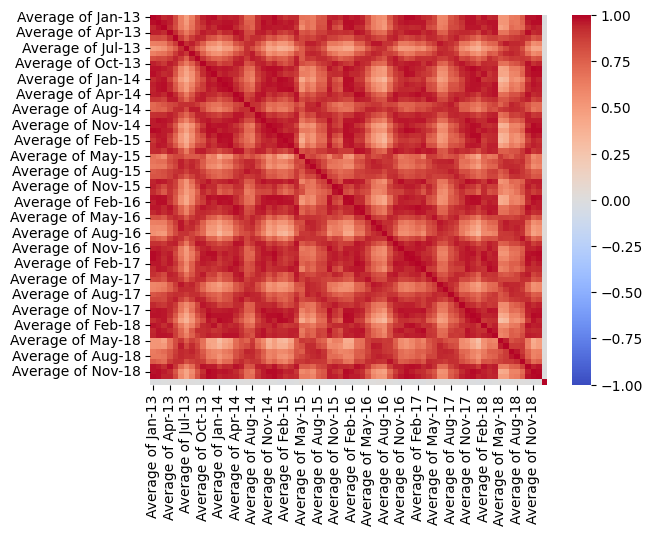

In [127]:
sns.heatmap(train[selected_columns_2 ].corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [128]:
len(selected_columns_2)

72

In [129]:
train.columns

Index(['patient_id', 'patient_zip3', 'patient_age', 'population', 'density',
       'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s',
       ...
       'Average of Oct-18', 'Average of Nov-18', 'Average of Dec-18',
       'metastatic_diagnosis_period', 'payer_type_encoded',
       'patient_state_encoded', 'Region_encoded', 'Division_encoded',
       'breast_cancer_diagnosis_code_encoded',
       'metastatic_cancer_diagnosis_code_encoded'],
      dtype='object', length=146)

In [130]:
# Predicted Variable = y
Y_train = train['metastatic_diagnosis_period']

In [131]:
X_train = train.drop(columns=['metastatic_diagnosis_period'])

In [132]:
X_test = test

In [133]:
X_train.shape

(12914, 145)

In [134]:
X_test.shape

(5646, 145)

###### Test Data

In [136]:
solution_data = pd.read_csv("/kaggle/input/widsdatathon2024-challenge2/solution_template.csv")

In [137]:
solution_data.shape

(5646, 2)

In [138]:
test.dtypes

patient_id                                    int64
patient_zip3                                  int64
patient_age                                   int64
population                                  float64
density                                     float64
                                             ...   
patient_state_encoded                       float64
Region_encoded                              float64
Division_encoded                            float64
breast_cancer_diagnosis_code_encoded        float64
metastatic_cancer_diagnosis_code_encoded    float64
Length: 145, dtype: object

In [139]:
test['patient_id'].head(10)

0    730681
1    334212
2    571362
3    907331
4    208382
5    852863
6    494644
7    852015
8    521061
9    907023
Name: patient_id, dtype: int64

In [140]:
solution_data.dtypes

patient_id                     int64
metastatic_diagnosis_period    int64
dtype: object

In [141]:
solution_data['patient_id'].head(10)

0    730681
1    334212
2    571362
3    907331
4    208382
5    852863
6    494644
7    852015
8    521061
9    907023
Name: patient_id, dtype: int64

In [142]:
test['patient_id'].tail(10)

5636    553916
5637    170619
5638    801815
5639    306903
5640    931444
5641    649011
5642    869024
5643    304800
5644    267406
5645    873886
Name: patient_id, dtype: int64

In [143]:
solution_data['patient_id'].tail(10)

5636    553916
5637    170619
5638    801815
5639    306903
5640    931444
5641    649011
5642    869024
5643    304800
5644    267406
5645    873886
Name: patient_id, dtype: int64

In [144]:
y_test = solution_data['metastatic_diagnosis_period']

In [145]:
y_test.shape

(5646,)

In [146]:
X_train.head(2)

,patient_id,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,payer_type_encoded,patient_state_encoded,Region_encoded,Division_encoded,breast_cancer_diagnosis_code_encoded,metastatic_cancer_diagnosis_code_encoded
0,268700,724,39,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,...,74.56,59.98,42.98,41.18,96.955858,99.296296,97.336937,95.130464,57.388827,88.929481
1,484983,629,55,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,...,72.64,58.36,39.68,39.71,96.955858,100.509759,96.284707,96.955767,61.021445,88.929481


In [147]:
X_test.head(2)

,patient_id,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,payer_type_encoded,patient_state_encoded,Region_encoded,Division_encoded,breast_cancer_diagnosis_code_encoded,metastatic_cancer_diagnosis_code_encoded
0,730681,713,55,4639.07,72.66,41.50,11.40,13.44,11.42,11.45,...,80.20,69.73,53.14,51.34,96.955858,99.296296,97.336937,95.130464,57.388827,88.929481
1,334212,283,60,10875.30,217.91,39.64,11.23,13.72,15.01,12.02,...,78.85,64.60,50.57,48.10,96.955858,100.509759,96.284707,96.955767,61.021445,88.929481


In [148]:
X_train.dtypes

patient_id                                    int64
patient_zip3                                  int64
patient_age                                   int64
population                                  float64
density                                     float64
                                             ...   
patient_state_encoded                       float64
Region_encoded                              float64
Division_encoded                            float64
breast_cancer_diagnosis_code_encoded        float64
metastatic_cancer_diagnosis_code_encoded    float64
Length: 145, dtype: object

In [149]:
X_test.dtypes

patient_id                                    int64
patient_zip3                                  int64
patient_age                                   int64
population                                  float64
density                                     float64
                                             ...   
patient_state_encoded                       float64
Region_encoded                              float64
Division_encoded                            float64
breast_cancer_diagnosis_code_encoded        float64
metastatic_cancer_diagnosis_code_encoded    float64
Length: 145, dtype: object

In [151]:
# Standardize the data set
scaler = StandardScaler()
# Fit and transform the training dat
X_train_scaled = scaler.fit_transform(X_train)

In [152]:
X_train_scaled

array([[-1.10657999,  0.5610219 , -1.53379523, ..., -0.35147761,
        -0.55595674, -0.5796733 ],
       [-0.27277081,  0.21669723, -0.32316453, ...,  0.07481199,
        -0.50449806, -0.5796733 ],
       [-1.07436998,  1.28954041, -0.02050685, ..., -0.79286246,
         1.85079442, -0.5796733 ],
       ...,
       [ 0.90660868,  1.30041383, -3.04708362, ..., -0.79286246,
        -0.55371369,  0.59765218],
       [-0.38636359, -0.31972436, -0.55015778, ...,  0.07481199,
         1.63061471,  2.37511532],
       [-0.67974254,  1.19892866,  0.28215083, ..., -0.79286246,
        -0.53057005, -0.18537011]])

In [153]:
# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [154]:
X_test_scaled

array([[ 0.67443838,  0.52115273, -0.32316453, ..., -0.35147761,
        -0.55595674, -0.5796733 ],
       [-0.85401965, -1.03736946,  0.05515757, ...,  0.07481199,
        -0.50449806, -0.5796733 ],
       [ 0.06023549,  0.81473482, -0.39882895, ..., -0.79286246,
         1.85079442, -0.5796733 ],
       ...,
       [-0.96740811,  1.24967124, -1.15547314, ...,  0.07481199,
        -0.55595674, -0.5796733 ],
       [-1.11156858,  1.22067548,  0.50914408, ...,  0.02444022,
         1.85079442,  2.37511532],
       [ 1.22651895, -1.62090916,  1.03879502, ...,  1.89138568,
        -0.48796613, -0.5796733 ]])

In [155]:
nan_mask = np.isnan(X_train_scaled)
nan_count = np.sum(nan_mask)

In [156]:
nan_mask_test = np.isnan(X_test_scaled)
nan_count_test = np.sum(nan_mask_test)

In [157]:
print(nan_count)

0


In [158]:
print(nan_count_test)

0


## Lasso Regularization

In [159]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [160]:
lasso = LassoCV(cv=5)  # LassoCV automatically performs cross-validation for alpha selection
lasso.fit(X_train_scaled, Y_train)

LassoCV(cv=5)

In [161]:
lasso_coefs = lasso.coef_

In [162]:
print("Number of coefficients:", len(lasso_coefs))


Number of coefficients: 145


In [163]:
selected_features_indices = [i for i, coef in enumerate(lasso_coefs) if coef != 0]
len(selected_features_indices)


16

In [164]:
selected_features_indices

[0, 2, 44, 48, 49, 51, 52, 53, 54, 66, 73, 85, 139, 140, 143, 144]

In [168]:
column_names = [X_train.columns[i] for i in selected_features_indices]

In [169]:
column_names

['patient_id',
 'patient_age',
 'education_some_college',
 'education_stem_degree',
 'labor_force_participation',
 'self_employed',
 'farmer',
 'race_white',
 'race_black',
 'veteran',
 'Average of Jul-13',
 'Average of Jul-14',
 'payer_type_encoded',
 'patient_state_encoded',
 'breast_cancer_diagnosis_code_encoded',
 'metastatic_cancer_diagnosis_code_encoded']

In [170]:
len(column_names)

16

In [165]:
# Select only the selected features from the scaled datasets
X_train_data = X_train_scaled[:, selected_features_indices]
X_test_data= X_test_scaled[:, selected_features_indices]


In [171]:
X_train_df = pd.DataFrame(X_train_data, columns=column_names)
X_test_df = pd.DataFrame(X_test_data, columns=column_names)

In [172]:
X_train_df.shape

(12914, 16)

In [173]:
X_test_df.shape

(5646, 16)

### Cross Validation and Model Selection

In [174]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor

In [175]:
svr = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
knnr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
mlpr = MLPRegressor()
xgbr = XGBRegressor()

In [176]:
# Create a dictionary to store the models
models = {
    'Support Vector Regressor': svr,
    'Linear Regression': lr,
    'SGD Regressor': sgdr,
    'K-Nearest Neighbors Regressor': knnr,
    'Gaussian Process Regressor': gpr,
    'Decision Tree Regressor': dtr,
    'Random Forest Regressor': rfr,
    'Gradient Boosting Regressor': gbr,
    'MLP Regressor': mlpr,
    'XGBoost Regressor': xgbr
}

In [177]:
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [178]:
def evaluate_models(models, X_train, y_train, X_test, y_test, cv=5):

    results = {}

    for name, model in models.items():
        print(f"Training {name}...")

        # Perform cross-validation
        y_train_pred = cross_val_predict(model, X_train, y_train, cv=cv)
        rmse_cv = np.sqrt(mean_squared_error(y_train, y_train_pred))
        r2_cv = r2_score(y_train, y_train_pred)

        # Train on the full training set and predict on the test set
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        r2_test = r2_score(y_test, y_test_pred)

        # Store the results
        results[name] = {
            'RMSE_CV': rmse_cv,
            'R²_CV': r2_cv,
            'RMSE_Test': rmse_test,
            'R²_Test': r2_test
        }

        print(f"{name} - Cross-Validation RMSE: {rmse_cv}, R²: {r2_cv}")
        print(f"{name} - Test RMSE: {rmse_test}, R²: {r2_test}")

        # Save the model
        #joblib.dump(model, f'{name.replace(" ", "_").lower()}_model.pkl')

    return results


In [179]:
# Assuming X_train, y_train, X_test, y_test are already defined
results = evaluate_models(models,X_train_df,Y_train,X_test_df,y_test)

# Display the results
results_df = pd.DataFrame(results).T
print("\nEvaluation Results:")
print(results_df)

Training Support Vector Regressor...
Support Vector Regressor - Cross-Validation RMSE: 92.01269910980736, R²: 0.28833553878460527
Support Vector Regressor - Test RMSE: 68.41806639873226, R²: -329.83258736514824
Training Linear Regression...
Linear Regression - Cross-Validation RMSE: 82.73161861569021, R²: 0.4246623697917402
Linear Regression - Test RMSE: 70.58159333606042, R²: -351.08668802302293
Training SGD Regressor...
SGD Regressor - Cross-Validation RMSE: 82.75517109284256, R²: 0.4243347428106822
SGD Regressor - Test RMSE: 68.38701380861345, R²: -329.5323486139749
Training K-Nearest Neighbors Regressor...
K-Nearest Neighbors Regressor - Cross-Validation RMSE: 90.64650755824714, R²: 0.3093120326862795
K-Nearest Neighbors Regressor - Test RMSE: 78.0283083502573, R²: -429.2997286019864
Training Gaussian Process Regressor...
Gaussian Process Regressor - Cross-Validation RMSE: 351.67174525729973, R²: -9.395722813464483
Gaussian Process Regressor - Test RMSE: 454.33835117626467, R²: -14

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

MLP Regressor - Cross-Validation RMSE: 82.8305435458706, R²: 0.42328564675489044
MLP Regressor - Test RMSE: 71.06570263123015, R²: -355.93307845756146
Training XGBoost Regressor...
XGBoost Regressor - Cross-Validation RMSE: 87.35678645164953, R²: 0.3585348942887726
XGBoost Regressor - Test RMSE: 76.83396155591791, R²: -416.2277069659171

Evaluation Results:
                                  RMSE_CV     R²_CV   RMSE_Test       R²_Test
Support Vector Regressor        92.012699  0.288336   68.418066   -329.832587
Linear Regression               82.731619  0.424662   70.581593   -351.086688
SGD Regressor                   82.755171  0.424335   68.387014   -329.532349
K-Nearest Neighbors Regressor   90.646508  0.309312   78.028308   -429.299729
Gaussian Process Regressor     351.671745 -9.395723  454.338351 -14587.998657
Decision Tree Regressor        119.709588 -0.204585  111.655453   -880.102763
Random Forest Regressor         85.474713  0.385877   68.701901   -332.583224
Gradient Boostin

## SGD Regression



In [180]:
# Define the SGDRegressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

In [181]:
sgd.fit(X_train_df, Y_train)

SGDRegressor(random_state=42)

In [183]:
y_pred = sgd.predict(X_test_df)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Initial R^2: {r2}')
print(f'Initial RMSE: {rmse}')


Initial R^2: -341.57796388955967
Initial RMSE: 69.62197955201869


In [185]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1, 1]  # Initial learning rate
}

In [194]:
from sklearn.model_selection import train_test_split, GridSearchCV

grid_search = GridSearchCV(SGDRegressor(max_iter=2000, tol=1e-3, random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_df, Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stocha

GridSearchCV(cv=5, estimator=SGDRegressor(max_iter=2000, random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'eta0': [0.001, 0.01, 0.1, 1],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive']},
             scoring='r2')

In [195]:
print(f'Best Params: {grid_search.best_params_}, Best R^2: {grid_search.best_score_}')

Best Params: {'alpha': 0.0001, 'eta0': 0.001, 'learning_rate': 'invscaling'}, Best R^2: 0.42449869451861943


In [197]:
best_sgd = grid_search.best_estimator_
best_sgd.fit(X_train_df, Y_train)


SGDRegressor(eta0=0.001, max_iter=2000, random_state=42)

In [193]:
y_pred_best = best_sgd.predict(X_test_df)
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f'R^2 with best model: {r2_best}')
print(f'RMSE with best model: {rmse_best}')

R^2 with best model: -350.9061858233288
RMSE with best model: 70.56349869266813


In [200]:
output_df = pd.DataFrame({'patient_id': X_test['patient_id'], 'metastatic_diagnosis_period':y_pred_best})

In [202]:
output_df['metastatic_diagnosis_period'] = output_df['metastatic_diagnosis_period'].astype(int)

In [203]:
output_df

,patient_id,metastatic_diagnosis_period
0,730681,59
1,334212,66
2,571362,221
3,907331,45
4,208382,226
...,...,...
5641,649011,209
5642,869024,62
5643,304800,54
5644,267406,239


In [205]:
output_df.to_csv('final_predictions4.csv', index=False)